<a href="https://colab.research.google.com/github/Yadavrahulbabulal/Python_Code/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [28]:
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

In [29]:
transactions = transactions.merge(products, on='ProductID', how='left')
data = transactions.merge(customers, on='CustomerID', how='left')

In [30]:
customer_data = customers[['CustomerID', 'Region']]
customer_data = customer_data.merge(customer_transactions, on='CustomerID', how='left')


In [31]:
features = customer_data[['total_spent', 'num_transactions', 'avg_quantity']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [32]:
# Merge the customer profile data with aggregated transaction data
customer_transactions = transactions.groupby('CustomerID').agg(
    total_spent=('TotalValue', 'sum'),
    num_transactions=('TransactionID', 'count'),
    avg_quantity=('Quantity', 'mean')
).reset_index()

# Merge with customer details
customer_data = customers[['CustomerID', 'Region']]  # You can include more features if needed
customer_data = customer_data.merge(customer_transactions, on='CustomerID', how='left')

# Display the merged data
print(customer_data.head())


  CustomerID         Region  total_spent  num_transactions  avg_quantity
0      C0001  South America      3354.52               5.0      2.400000
1      C0002           Asia      1862.74               4.0      2.500000
2      C0003  South America      2725.38               4.0      3.500000
3      C0004  South America      5354.88               8.0      2.875000
4      C0005           Asia      2034.24               3.0      2.333333


In [33]:
from sklearn.preprocessing import StandardScaler

# Select features for clustering (excluding CustomerID and Region)
features = customer_data[['total_spent', 'num_transactions', 'avg_quantity']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Display scaled features
print(scaled_features[:5])


[[-0.06170143 -0.01145819 -0.23346379]
 [-0.87774353 -0.46749414 -0.05496886]
 [-0.40585722 -0.46749414  1.72998043]
 [ 1.03254704  1.35664965  0.61438712]
 [-0.78392861 -0.92353008 -0.35246041]]


In [34]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_transactions[['total_spent', 'num_transactions', 'avg_quantity']])

In [35]:
db_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_data)
    labels = kmeans.labels_
    db_score = davies_bouldin_score(scaled_data, labels)
    db_scores.append(db_score)


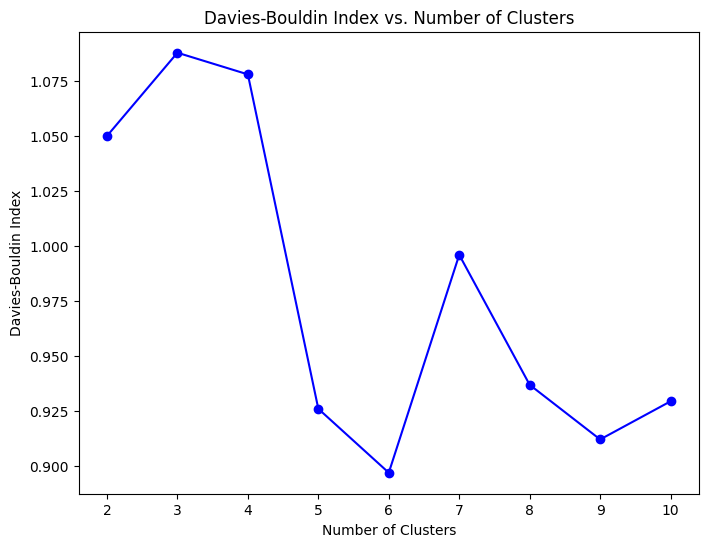

In [36]:
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), db_scores, marker='o', color='b')
plt.title('Davies-Bouldin Index vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')
plt.show()

In [37]:
optimal_clusters = db_scores.index(min(db_scores)) + 2
print(f"Optimal number of clusters: {optimal_clusters}")

Optimal number of clusters: 6


In [38]:
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
customer_transactions['Cluster'] = kmeans.fit_predict(scaled_data)

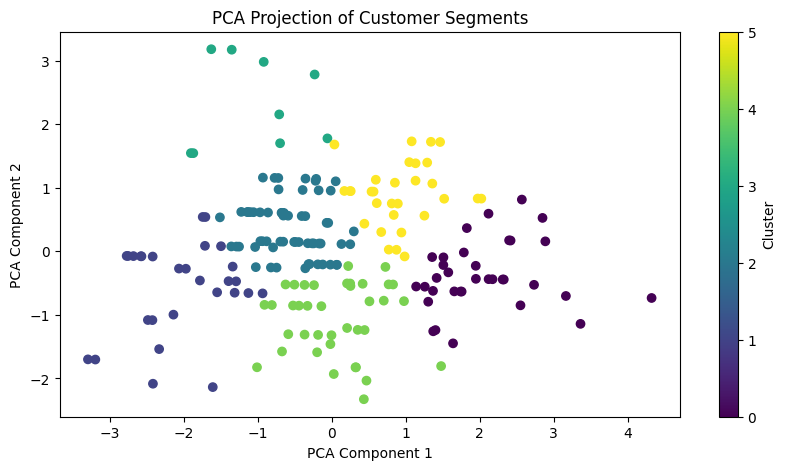

In [39]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

plt.figure(figsize=(10, 5))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=customer_transactions['Cluster'], cmap='viridis')
plt.title('PCA Projection of Customer Segments')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [40]:
segment_summary = customer_transactions.groupby('Cluster').agg(
    avg_total_spent=('total_spent', 'mean'),
    avg_num_transactions=('num_transactions', 'mean'),
    avg_quantity=('avg_quantity', 'mean')
).reset_index()

print("\nSummary of Customer Segments:")
print(segment_summary)



Summary of Customer Segments:
   Cluster  avg_total_spent  avg_num_transactions  avg_quantity
0        0      6173.227941              8.205882      2.678052
1        1      1066.381786              2.464286      1.861310
2        2      2703.006333              3.966667      2.627778
3        3      1563.816667              2.000000      3.592593
4        4      3406.302632              6.236842      2.018567
5        5      4818.429667              5.300000      3.125079
